In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
%matplotlib inline

In [2]:
ass = pd.read_csv("./cleaned data/AS.csv", low_memory=False, index_col=False)
mp = pd.read_csv("./cleaned data/MP.csv", low_memory=False, index_col=False)
up = pd.read_csv("./cleaned data/UP.csv", low_memory=False, index_col=False)
jh = pd.read_csv("./cleaned data/JH.csv", low_memory=False, index_col=False)
rj = pd.read_csv("./cleaned data/RJ.csv", low_memory=False, index_col=False)
bh = pd.read_csv("./cleaned data/BH.csv", low_memory=False, index_col=False)
cg = pd.read_csv("./cleaned data/CG.csv", low_memory=False, index_col=False)
od = pd.read_csv("./cleaned data/OD.csv", low_memory=False, index_col=False)
ut = pd.read_csv("./cleaned data/UT.csv", low_memory=False, index_col=False)

In [3]:
result = pd.concat([ut, cg, jh, ass, od, rj, mp, bh, up])

In [4]:
result.shape

(120969, 16)

In [6]:
result.loc[(result['illness_type'] != 0), 'illness_type'] = 1

In [7]:
result[result['illness_type'] == 0].shape

(87107, 16)

In [8]:
result[result['illness_type'] == 1].shape

(33862, 16)

## Model Training

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

In [10]:
x_train, x_test, y_train, y_test = train_test_split(result.drop('illness_type', axis=1), result['illness_type'], test_size=0.3, random_state=22)

In [11]:
x_train.shape, y_train.shape

((84678, 15), (84678,))

In [12]:
x_test.shape, y_test.shape

((36291, 15), (36291,))

In [13]:
x_train['state_code'].value_counts()

9.0     24448
10.0    13774
23.0    10200
21.0     8992
8.0      8514
20.0     6040
18.0     5435
22.0     4799
5.0      2476
Name: state_code, dtype: int64

In [14]:
svc = SVC()
l_svc = LinearSVC()
knc = KNeighborsClassifier(n_neighbors=49)
dtc = DecisionTreeClassifier(min_samples_split=300, random_state=200)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=231, random_state=200)

In [15]:
clfs = {'SVC' : svc, 'Linear SVC' : l_svc, 'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [16]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    return clf

In [17]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [18]:
pred_scores = []
pds = []
# for k,v in clfs.items():
#     clf = train_classifier(v, x_train, y_train)
#     pred = predict_labels(v,x_test)
#     pred_scores.append((k, [accuracy_score(y_test,pred)]))
#     print(k," - ",clf.score(x_test, y_test))
#     cm = confusion_matrix(y_test, pred)
#     print(cm)
#     sn.heatmap(cm, annot=True)
#     plt.show()
#     print("---------------------------------------\n\n")

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
abc = AdaBoostClassifier(n_estimators=231, random_state=200)
bc = BaggingClassifier(n_estimators=231, random_state=200)
etc = ExtraTreesClassifier(n_estimators=231, random_state=200)

0.75368548676
[[24284  1742]
 [ 7197  3068]]


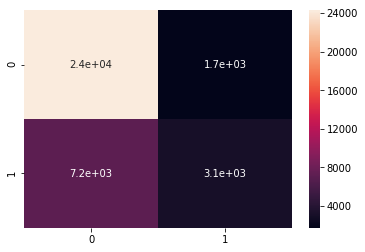

In [21]:
clf = train_classifier(abc, x_train, y_train)
pred = predict_labels(abc,x_test)
pred_scores.append(('ABC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

Accuracy:  77.2615800061
Confusion Matrix: 
 [[22924  3102]
 [ 5150  5115]]

Heatmap for Confusion Matrix:


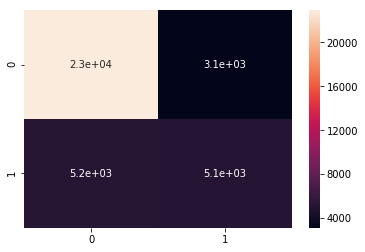

In [22]:
clf = train_classifier(bc, x_train, y_train)
pred = predict_labels(bc,x_test)
pred_scores.append(('Bagging Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

0.769887850982
[[23081  2945]
 [ 5406  4859]]


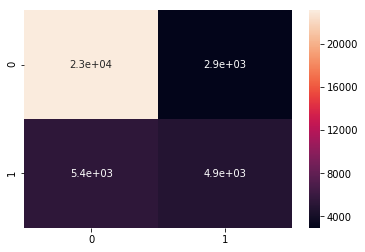

In [23]:
clf = train_classifier(etc, x_train, y_train)
pred = predict_labels(etc,x_test)
pred_scores.append(('ETC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

Accuracy:  77.8264583506
Confusion Matrix: 
 [[23502  2524]
 [ 5523  4742]]

Heatmap for Confusion Matrix:


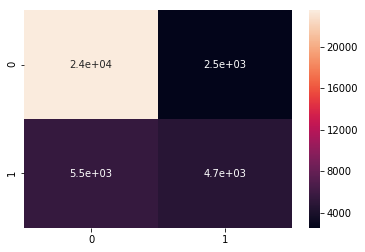

In [24]:
clf = train_classifier(rfc, x_train, y_train)
pred = predict_labels(rfc,x_test)
pred_scores.append(('Random Forest Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

Accuracy:  71.378578711
Confusion Matrix: 
 [[25343   683]
 [ 9704   561]]

Heatmap for Confusion Matrix:


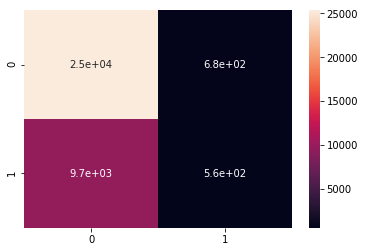

In [25]:
clf = train_classifier(lrc, x_train, y_train)
pred = predict_labels(lrc,x_test)
pred_scores.append(('Logistic Regression Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

Accuracy:  77.121049296
Confusion Matrix: 
 [[23323  2703]
 [ 5600  4665]]

Heatmap for Confusion Matrix:


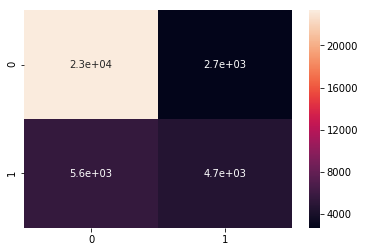

In [26]:
clf = train_classifier(dtc, x_train, y_train)
pred = predict_labels(dtc,x_test)
pred_scores.append(('Decision Tree Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

Accuracy:  76.15386735
Confusion Matrix: 
 [[23570  2456]
 [ 6198  4067]]

Heatmap for Confusion Matrix:


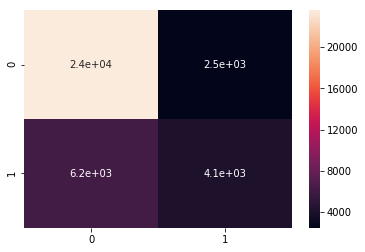

In [27]:
clf = train_classifier(knc, x_train, y_train)
pred = predict_labels(knc,x_test)
pred_scores.append(('K-nearest Neighbors Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

In [28]:
scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Accuracy Score'])
scores

,Accuracy Score
ABC,0.753685
Bagging Classifier,77.261580
ETC,0.769888
Random Forest Classifier,77.826458
Logistic Regression Classifier,71.378579
Decision Tree Classifier,77.121049
K-nearest Neighbors Classifier,76.153867


In [29]:
pds

[77.261580006062118,
 77.826458350555242,
 71.378578710975177,
 77.121049295968703,
 76.153867350031689]

In [30]:
import numpy as np

In [31]:
label = ['Bagging Classifier','Random Forest', 'Logistic Regression', 'Decision Tree','K-nearest Neighbor']

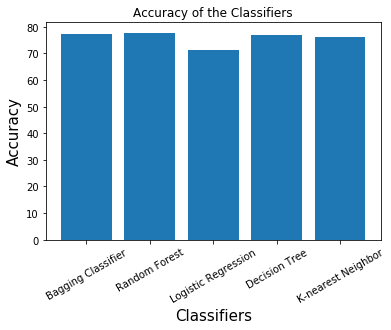

In [32]:
index = np.arange(len(label))
plt.bar(index, pds)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Accuracy of the Classifiers')

In [33]:
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=None)

In [34]:
pred_score = []

In [35]:
score = cross_val_score(rfc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=3)

In [36]:
score

array([ 0.7814876 ,  0.78595041,  0.77715325,  0.77979831,  0.77682262,
        0.78409654,  0.78293933,  0.77893519,  0.78306878,  0.78191138,
        0.78637566,  0.78406085,  0.78108466,  0.78339947,  0.7838955 ,
        0.77662037,  0.78753307,  0.78455688,  0.78753307,  0.79117063])

In [37]:
score.max()*100

79.117063492063494

In [38]:
pred_score.append(score.max()*100)

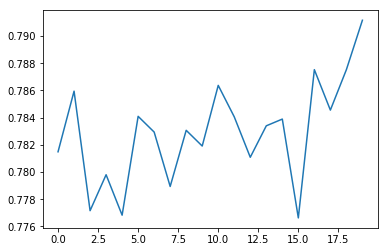

In [39]:
plt.plot(score)

In [40]:
score.mean()*100

78.291967852112833

In [41]:
pred_score

[79.117063492063494]

In [42]:
score = cross_val_score(knc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=3)

In [43]:
score

array([ 0.7646281 ,  0.75553719,  0.76095222,  0.75351298,  0.77450818,
        0.76343197,  0.76987932,  0.76289683,  0.76934524,  0.76934524,
        0.76190476,  0.75314153,  0.76207011,  0.76058201,  0.7662037 ,
        0.76719577,  0.76868386,  0.75859788,  0.7662037 ,  0.76686508])

In [44]:
score.max()*100

77.450818317077207

In [45]:
pred_score.append(score.max()*100)

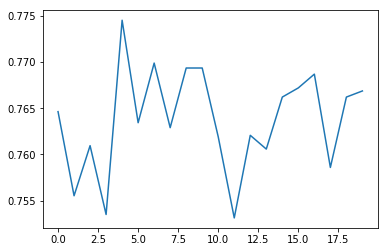

In [46]:
plt.plot(score)

In [47]:
score.mean()*100

76.377428393474148

In [48]:
pred_score

[79.117063492063494, 77.450818317077207]

In [49]:
score = cross_val_score(dtc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=3)

In [50]:
score

array([ 0.76677686,  0.77553719,  0.77682262,  0.77103653,  0.77946768,
        0.7736816 ,  0.77450818,  0.76636905,  0.78769841,  0.77166005,
        0.77529762,  0.77314815,  0.77810847,  0.77645503,  0.77083333,
        0.77595899,  0.78257275,  0.77480159,  0.77777778,  0.77430556])

In [51]:
score.max()*100

78.769841269841265

In [52]:
score.mean()*100

77.514087181949833

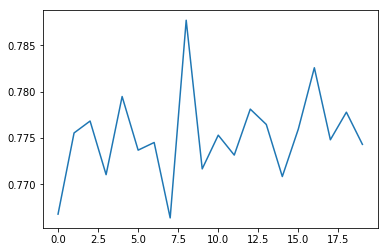

In [53]:
plt.plot(score)

In [54]:
pred_score.append(score.max()*100)

In [55]:
pred_score

[79.117063492063494, 77.450818317077207, 78.769841269841265]

In [56]:
labels = ['random Forest', 'K-nearest Neighbors', 'Decision Tree']

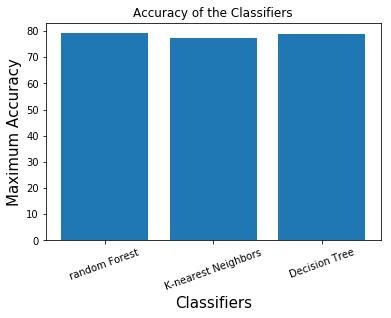

In [57]:
index = np.arange(len(labels))
plt.bar(index, pred_score)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Maximum Accuracy', fontsize=15)
plt.xticks(index, labels, fontsize=10, rotation=20)
plt.title('Accuracy of the Classifiers')

### Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

In [30]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [32]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(result.drop('illness_type', axis=1), result['illness_type'])
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 500}

In [34]:
rf = RandomForestClassifier(n_estimators = 500,max_depth= 6, max_features= 'log2', criterion= 'entropy',random_state=42,n_jobs=-1)

In [35]:
score = cross_val_score(rf, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=-1)

In [36]:
score

array([ 0.74405155,  0.74107733,  0.74549661,  0.74533135,  0.74429752,
        0.74347107,  0.74607373,  0.74140212,  0.74272487,  0.74222884,
        0.74516289,  0.74301306,  0.74483215,  0.74417066,  0.74665123,
        0.74632049,  0.74731272,  0.74417066,  0.74962791,  0.74598975])

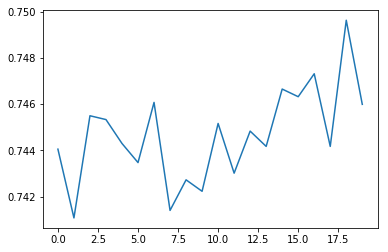

In [37]:
plt.plot(score)

In [38]:
score.mean()

0.74467032606803396